In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [37]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
df=pd.read_csv("Loan_data.csv")

In [3]:
#KEŞİFSEL VERİ ANALİZİ

def check_df(dataframe): #verisetinin özelliklerini göster
    print("-----------SHAPE--------")
    print(dataframe.shape) #satır ve sütun sayısı
    print("-----------COLUMNS---------")
    print(dataframe.columns) #sütun adlarını gösterir
    print("------------INFO------------")
    dataframe.info() #verisetinin temel bilgileri
    print("-------------TYPES-----------")
    print(dataframe.dtypes) #her sütunun veri türü
    print("-------------HEAD--------------")
    print(dataframe.head()) #baş kısım
    print("------------TAIL---------------")
    print(dataframe.tail()) #son birkaç satır
    print("-----------NA---------------")
    print(dataframe.isnull().sum())#eksik değerleri gösterir

In [4]:
check_df(df) #check_df fonksiyonu çağrılır

-----------SHAPE--------
(45000, 14)
-----------COLUMNS---------
Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')
------------INFO------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 no

In [5]:
print("--------SAMPLE----------")  #rastgele veri getirir
print(df.sample())

--------SAMPLE----------
       person_age person_gender person_education  person_income  \
34324        26.0        female         Bachelor        53514.0   

       person_emp_exp person_home_ownership  loan_amnt      loan_intent  \
34324               1                  RENT     5000.0  HOMEIMPROVEMENT   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
34324           8.67                 0.09                         4.0   

       credit_score previous_loan_defaults_on_file  loan_status  
34324           630                            Yes            0  


In [6]:
df.describe() #sayısal sütunlara ilişkin istatistikler

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [7]:
#kategorik,sayısal, kardinal verilerin tespiti
def column_detection(dataframe:pd.DataFrame,cat_th:int=10,car_th: int=29): #eşik değerlerin verilmesi
    cat_cols=[col for col in dataframe.columns if dataframe[col].dtypes =="0"] #veri türü 0 olanlar kategorik kabul ediliyor, liste oluşturuluyor
    num_but_cat=[col for col in dataframe.columns if dataframe[col].nunique()<cat_th and dataframe[col].dtypes !="0"] #hem sayısal değer hem kategorik
    cat_but_car=[col for col in dataframe.columns if dataframe[col].nunique()>cat_th and dataframe[col].dtypes !="0"]
    cat_cols=cat_cols+num_but_cat
    cat_cols=[col for col in cat_cols if col not in cat_but_car]
    
    num_cols=[col for col in dataframe.columns if dataframe[col].dtypes !="0"]
    num_cols=[col for col in num_cols if col not in num_but_cat]
    
    print("\n--------------CATEGORIC------------")
    print(cat_cols)
    print("\n--------------NUMERIC------------")
    print(num_cols)
    print("\n--------------CATEGORIC BUT CARDINAL------------")
    print(cat_but_car)
    print("\n--------------NUMERIC BUT CATEGORIC------------")
    print(num_but_cat)
    print("\n--------------COLUMNS OVERVİEW-----------------")
    
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols,num_cols,cat_but_car,num_but_cat

In [8]:
cat_cols,num_cols,cat_but_car,num_but_cat=column_detection(df)

TypeError: data type '' not understood

In [9]:
#Görselleştirme
def cat_summary(dataframe, col_name, plot=True):  #her bir kategoriye ait gözlem sayılarını ve bu sayıların toplam gözlem sayısına oranını 
    print(pd.DataFrame({col_name:dataframe[col_name].value_counts(), 
                        "Ratio":100 * dataframe[col_name].value_counts()/len(dataframe)}))
    
    if plot:
        sns.countplot(x=dataframe[col_name],data=dataframe)  #her bir kategorinin sıklığını görselleştirir.
        plt.show(block=True)
        
for col in cat_cols:
    cat_summary(df,col)
    
def hist_num_columns_show(dataframe,num_column):
    mean_value = dataframe[num_column].mean()
    dataframe[num_column].hist(bins=20)
    plt.axvline(mean_value, color='r', linestyle='dashed', linewidth=2)  #ortalama
    plt.xlabel(num_column)
    plt.ylabel("Frequency")
    plt.title(f'Histogram of {num_column} with Mean Value')
    plt.show(block=True)
    
for num_col in num_cols:
    hist_num_columns_show(df,num_col)
    
    

NameError: name 'cat_cols' is not defined

<function matplotlib.pyplot.show(close=None, block=None)>

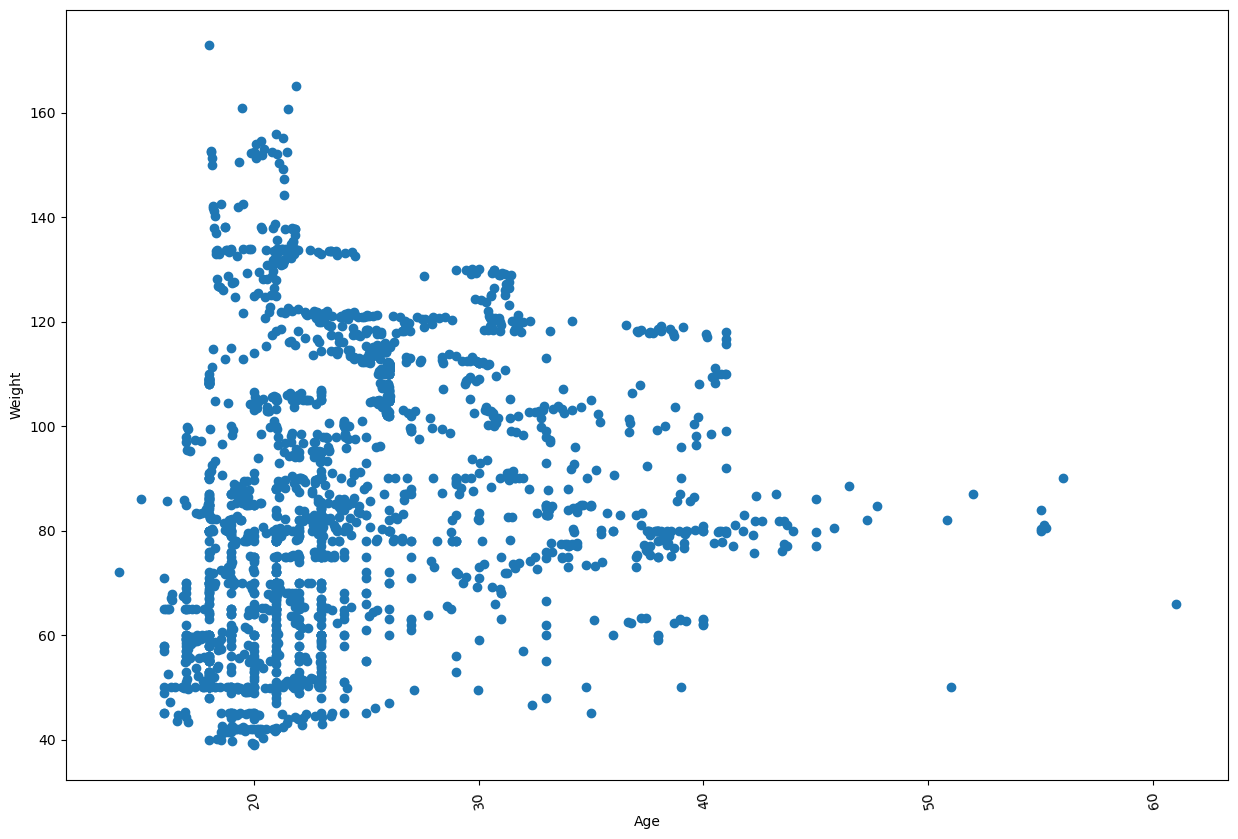

In [18]:
plt.figure(figsize=(15,10))
plt.scatter("Age","Weight",data=df)
plt.xticks(rotation=100)
plt.xlabel("Age")
plt.ylabel("Weight")
plt.show

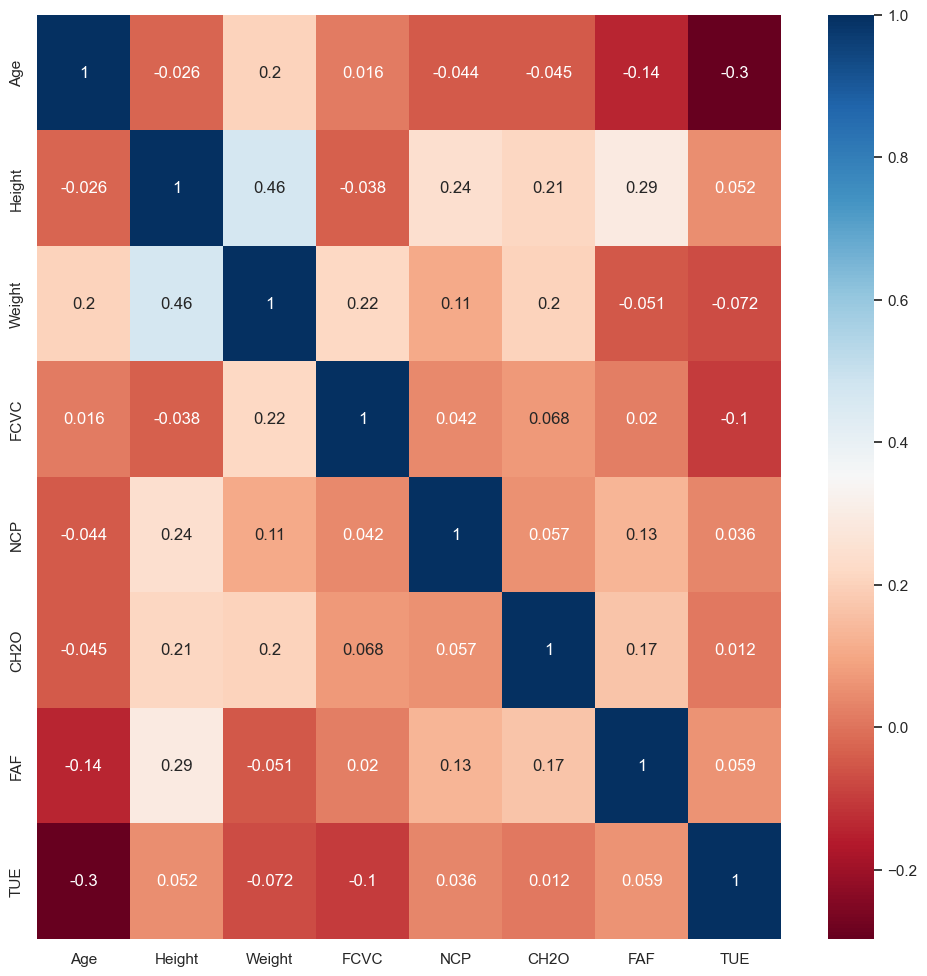

In [21]:
corr=df[num_cols].corr()
sns.set(rc={'figure.figsize':(12,12)})
sns.heatmap(corr,cmap="RdBu",annot=True)
plt.show()

In [29]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Kategorik verileri etiketleme (Label Encoding)
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

# Özellikler ve hedef değişkeni ayırma
X = df.drop('NObeyesdad', axis=1)  # Özellikler
y = df['NObeyesdad']  # Hedef değişken

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Özellikleri ölçeklendirme
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [30]:
# KNN algoritmasını tanımlama (komşu sayısını değiştirerek)
from sklearn.neighbors import KNeighborsClassifier

k = 1
knn = KNeighborsClassifier(n_neighbors=k)

# Modeli eğitim verisi ile eğitme
knn.fit(X_train, y_train)

# Test verisi ile tahmin yapma
y_pred = knn.predict(X_test)

# Doğruluk yüzdesini hesaplama
accuracy = accuracy_score(y_test, y_pred)
print(f'KNN (komşu sayısı = {k}) Doğruluk: {accuracy:.2f}%')

KNN (komşu sayısı = 1) Doğruluk: 0.83%


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [31]:
# Gaussian Naive Bayes sınıflandırıcısını tanımlama ve eğitme
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Gaussian Naive Bayes ile tahmin yapma
y_pred_gnb = gnb.predict(X_test)

# Doğruluk yüzdesini hesaplama ve yazdırma
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print(f'Gaussian Naive Bayes Doğruluk: {accuracy_gnb:.2f}%')


Gaussian Naive Bayes Doğruluk: 0.61%


In [32]:
from sklearn.tree import DecisionTreeClassifier

# Karar Ağacı sınıflandırıcısını tanımlama ve eğitme
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Karar Ağacı ile tahmin yapma
y_pred_dt = dt.predict(X_test)

# Doğruluk yüzdesini hesaplama ve yazdırma
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Karar Ağaçları Doğruluk: {accuracy_dt:.2f}%')


Karar Ağaçları Doğruluk: 0.91%


In [33]:
from sklearn.linear_model import LogisticRegression

# Lojistik Regresyon modelini tanımlama ve eğitme
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

# Lojistik Regresyon ile tahmin yapma
y_pred_lr = lr.predict(X_test)

# Doğruluk yüzdesini hesaplama ve yazdırma
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f'Lojistik Regresyon Doğruluk: {accuracy_lr:.2f}%')


Lojistik Regresyon Doğruluk: 0.86%


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest sınıflandırıcısını tanımlama ve eğitme
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Random Forest ile tahmin yapma
y_pred_rf = rf.predict(X_test)

# Doğruluk yüzdesini hesaplama ve yazdırma
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Doğruluk: {accuracy_rf:.2f}%')


Random Forest Doğruluk: 0.94%


In [35]:
from sklearn.svm import SVC

# SVM modelini tanımlama ve eğitme
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

# SVM ile tahmin yapma
y_pred_svm = svm.predict(X_test)

# Doğruluk yüzdesini hesaplama ve yazdırma
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Doğruluk: {accuracy_svm:.2f}%')


SVM Doğruluk: 0.95%


In [37]:
from sklearn.ensemble import GradientBoostingClassifier
# Gradient Boosting modelini tanımlama ve eğitme
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train, y_train)

# Test verisi ile tahmin yapma
y_pred = gradient_boosting.predict(X_test)

# Doğruluk yüzdesini hesaplama
accuracy = accuracy_score(y_test, y_pred)
print(f'Gradient Boosting Doğruluk: {accuracy:.2f}%')

Gradient Boosting Doğruluk: 0.95%


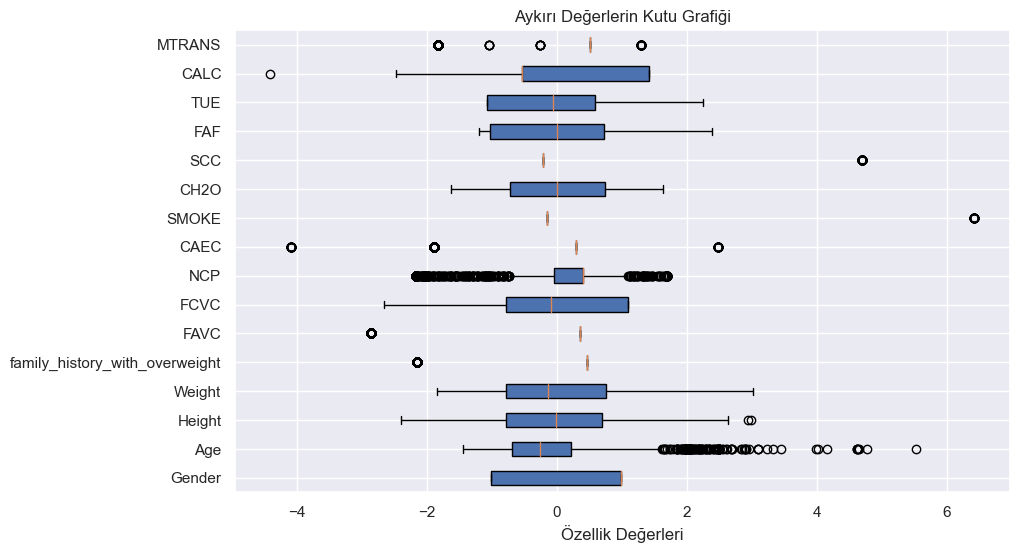

In [38]:
import matplotlib.pyplot as plt

# Özelliklerin kutu grafiğini oluşturma
plt.figure(figsize=(10, 6))
plt.boxplot(X_train, vert=False, patch_artist=True)
plt.title('Aykırı Değerlerin Kutu Grafiği')
plt.xlabel('Özellik Değerleri')
plt.yticks(range(1, len(X.columns) + 1), X.columns)
plt.show()


In [41]:
# Aykırı değerleri IQR yöntemi ile tespit ve çıkarma
def remove_outliers(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[~((df[columns] < lower_bound) | (df[columns] > upper_bound)).any(axis=1)]

# Sadece sayısal sütunları seç
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Aykırı değerleri çıkar
data_cleaned = remove_outliers(df, numeric_columns)

# Aykırı değerler çıkarıldıktan sonra veri setinin boyutunu yazdırma
print(f'Orijinal veri seti boyutu: {df.shape}')
print(f'Temizlenmiş veri seti boyutu: {data_cleaned.shape}')

# Temizlenmiş veri setini inceleyin
print(data_cleaned.head())

Orijinal veri seti boyutu: (2111, 17)
Temizlenmiş veri seti boyutu: (1409, 17)
   Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       0  21.0    1.62    64.0                               1     0   2.0   
1       0  21.0    1.52    56.0                               1     0   3.0   
2       1  23.0    1.80    77.0                               1     0   2.0   
3       1  27.0    1.80    87.0                               0     0   3.0   
5       1  29.0    1.62    53.0                               0     1   2.0   

   NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS  NObeyesdad  
0  3.0     2      0   2.0    0  0.0  1.0     3       3           1  
1  3.0     2      1   3.0    1  3.0  0.0     2       3           1  
2  3.0     2      0   2.0    0  2.0  1.0     1       3           1  
3  3.0     2      0   2.0    0  2.0  0.0     1       4           5  
5  3.0     2      0   2.0    0  0.0  0.0     2       0           1  


In [42]:
data_cleaned.to_csv("veriseti_aykirisiz.csv", index=False)


In [43]:
data_no_outliers = pd.read_csv("veriseti_aykirisiz.csv")


In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Aykırı değerleri IQR yöntemi ile tespit ve çıkarma
def remove_outliers(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[~((df[columns] < lower_bound) | (df[columns] > upper_bound)).any(axis=1)]

# Veri setini yükle
data = pd.read_csv("veriseti_aykirisiz.csv")

# Sadece sayısal sütunları seç
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Aykırı değerleri çıkar
data_cleaned = remove_outliers(data, numeric_columns)

# Özellikler ve hedef değişkeni ayırma
X = data_cleaned.drop('NObeyesdad', axis=1)  # Özellikler
y = data_cleaned['NObeyesdad']  # Hedef değişken

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Özellikleri ölçeklendirme
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# KNN algoritmasını tanımlama (komşu sayısını değiştirerek)
k = 1 # Komşu sayısını burada değiştirebilirsiniz
knn = KNeighborsClassifier(n_neighbors=k)

# Modeli eğitim verisi ile eğitme
knn.fit(X_train, y_train)

# Test verisi ile tahmin yapma
y_pred = knn.predict(X_test)

# Doğruluk yüzdesini hesaplama
accuracy = accuracy_score(y_test, y_pred)
print(f'KNN (komşu sayısı = {k}) Doğruluk: {accuracy:.2f}%')


KNN (komşu sayısı = 1) Doğruluk: 0.93%


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [45]:

# Naive Bayes algoritmasını tanımlama
naive_bayes = GaussianNB()

# Modeli eğitim verisi ile eğitme
naive_bayes.fit(X_train, y_train)

# Test verisi ile tahmin yapma
y_pred = naive_bayes.predict(X_test)

# Doğruluk yüzdesini hesaplama
accuracy = accuracy_score(y_test, y_pred)
print(f'Naive Bayes Doğruluk: {accuracy:.2f}%')

Naive Bayes Doğruluk: 0.89%


In [46]:
# Özellikleri ölçeklendirme
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Lojistik regresyon modelini tanımlama ve eğitme
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Test verisi ile tahmin yapma
y_pred = log_reg.predict(X_test)

# Doğruluk yüzdesini hesaplama
accuracy = accuracy_score(y_test, y_pred)
print(f'Lojistik Regresyon Doğruluk: {accuracy:.2f}%')

Lojistik Regresyon Doğruluk: 0.90%


In [47]:
# Karar Ağacı modelini tanımlama ve eğitme
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Test verisi ile tahmin yapma
y_pred = decision_tree.predict(X_test)

# Doğruluk yüzdesini hesaplama
accuracy = accuracy_score(y_test, y_pred)
print(f'Karar Ağaçları Doğruluk: {accuracy:.2f}%')

Karar Ağaçları Doğruluk: 0.97%


In [48]:
# Random Forest modelini tanımlama ve eğitme
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

# Test verisi ile tahmin yapma
y_pred = random_forest.predict(X_test)

# Doğruluk yüzdesini hesaplama
accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Doğruluk: {accuracy:.2f}%')

Random Forest Doğruluk: 0.95%


In [49]:

# Özellikleri ölçeklendirme
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# SVM modelini tanımlama ve eğitme
svm = SVC()
svm.fit(X_train, y_train)

# Test verisi ile tahmin yapma
y_pred = svm.predict(X_test)

# Doğruluk yüzdesini hesaplama
accuracy = accuracy_score(y_test, y_pred)
print(f'SVM Doğruluk: {accuracy:.2f}%')


SVM Doğruluk: 0.93%


In [50]:
# Gradient Boosting modelini tanımlama ve eğitme
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train, y_train)

# Test verisi ile tahmin yapma
y_pred = gradient_boosting.predict(X_test)

# Doğruluk yüzdesini hesaplama
accuracy = accuracy_score(y_test, y_pred)
print(f'Gradient Boosting Doğruluk: {accuracy:.2f}%')

Gradient Boosting Doğruluk: 0.97%


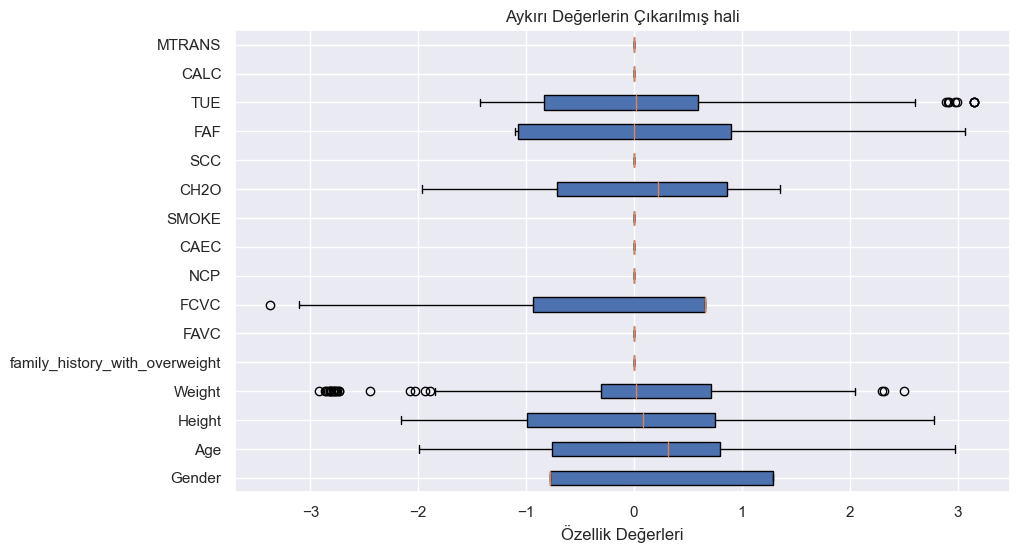

In [219]:
import matplotlib.pyplot as plt

# Özelliklerin kutu grafiğini oluşturma
plt.figure(figsize=(10, 6))
plt.boxplot(X_train, vert=False, patch_artist=True)
plt.title('Aykırı Değerlerin Çıkarılmış hali')
plt.xlabel('Özellik Değerleri')
plt.yticks(range(1, len(X.columns) + 1), X.columns)
plt.show()
